<a href="https://colab.research.google.com/github/ninawang4/Alumni-Connector/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd
import numpy as np
import string

In [ ]:


with open('/content/drive/MyDrive/NLP_project/Data/mbti_k_instagram_captions.csv', 'r', encoding='utf-8') as f:
    df = pd.DataFrame(csv.reader(f))
    df.columns = df.iloc[0]
    df = df[1:].reset_index(drop=True)
    print(df.head())

0                        caption    username  mbti      group    name
0                            📸\n  suye.on2di  ISTJ  Weki Meki  Suyeon
1  제 손이 또...커튼을 망가트리고 말았습니다...\n  suye.on2di  ISTJ  Weki Meki  Suyeon
2                      Synergy\n  suye.on2di  ISTJ  Weki Meki  Suyeon
3                         해보자고\n  suye.on2di  ISTJ  Weki Meki  Suyeon
4                         🌻😁❣️\n  suye.on2di  ISTJ  Weki Meki  Suyeon


In [ ]:
# df.head()
# df.group.value_counts()
users = pd.DataFrame()
users['username'] = df.username.unique()
indices = [df.index[df['username'] == x].tolist()[0] for x in users['username']]
users['type'] = [df['mbti'][x] for x in indices]

# Data Exploration and preliminary analysis

Text(0.5, 0, 'Number of Users')

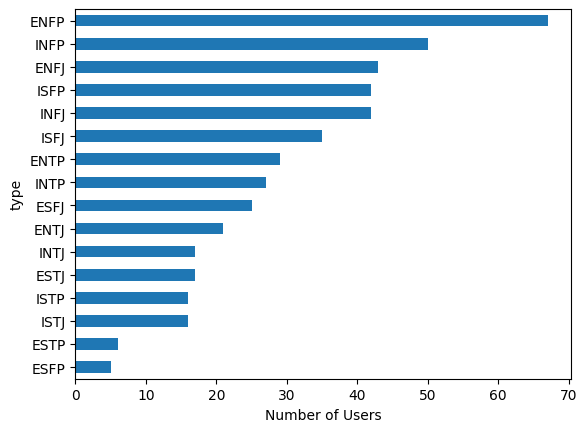

In [ ]:
ax = users.value_counts('type').sort_values().plot(kind="barh")
ax.set_xlabel("Number of Users")

In [ ]:
users.value_counts('type')

type
ENFP    67
INFP    50
ENFJ    43
INFJ    42
ISFP    42
ISFJ    35
ENTP    29
INTP    27
ESFJ    25
ENTJ    21
ESTJ    17
INTJ    17
ISTJ    16
ISTP    16
ESTP     6
ESFP     5
dtype: int64

rows 140332
columns 5


Text(0.5, 0, 'Number of Captions')

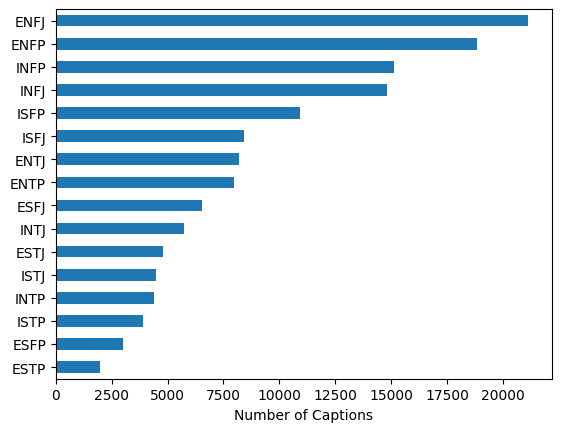

In [ ]:
print('rows', df.shape[0])
print('columns', df.shape[1])
df.head()
ax = df.mbti.value_counts().sort_values().plot(kind='barh')
ax.set_xlabel("Number of Captions")
# ax.set_ylabel("y label")

In [ ]:
caption_lengths = []
for caption in df['caption']:
  caption_lengths.append(len(caption))

caption_lengths = np.array(caption_lengths)

In [ ]:
length_cutoff = 50

df_new = df[(caption_lengths >= length_cutoff)]
df_new['caption_lengths'] = caption_lengths[caption_lengths >= length_cutoff]

<ipython-input-35-49fa97ad5fd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['caption_lengths'] = caption_lengths[caption_lengths >= length_cutoff]


In [ ]:
df_new.value_counts('mbti')

mbti
ENFJ    7212
ENFP    5069
ISFP    3984
INFP    3630
INFJ    3266
ENTJ    2570
ISFJ    2372
INTJ    2342
ENTP    1965
ESFJ    1872
ESTJ    1781
INTP    1385
ISTJ    1265
ISTP    1061
ESFP     695
ESTP     439
dtype: int64

rows 40908
columns 6
chungha_official    1900
kwon_jo             1491
alexa_zbofficial     984
miyayeah             697
ravithecrackkidz     636
                    ... 
0.0_handong            1
moon_ko_ng             1
simbasonof             1
im_theyeon             1
jh_dkz                 1
Name: username, Length: 442, dtype: int64


Text(0.5, 0, 'Number of Captions')

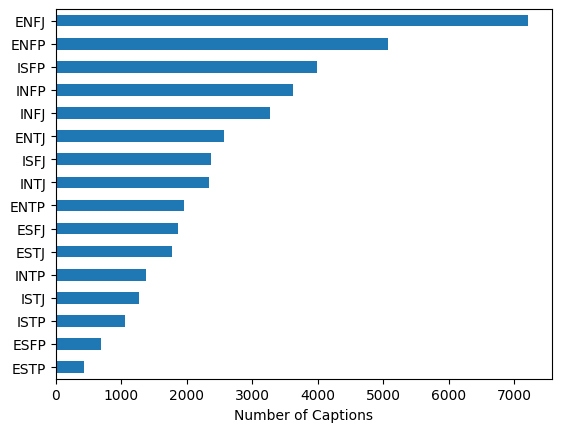

In [ ]:
print('rows', df_new.shape[0])
print('columns', df_new.shape[1])
df_new.head()
print(df_new.username.value_counts())
ax = df_new.mbti.value_counts().sort_values().plot(kind='barh')
ax.set_xlabel("Number of Captions")


In [ ]:
df_solo = df_new[df_new['caption'].str.contains("#MLBKOREA")]
df_solo.head()

,caption,username,mbti,group,name,caption_lengths
31126,"한국선수들 정말 응원합니다 , 킹캉세레머니 보고싶어요 <3 ㅋㅋ #SEVENMAJO...",bumkeyk,ENTJ,SHINee,Key,100
130748,"_ #협찬 \n벌써 겨울 👑❄️🤍 , \n\n@mlbkorea \n@mlbcrew....",yn_s_1230,INFP,AOA (ex),YuNa,89
130749,"_ #협찬 \n☀️🌈💜, \n\n@mlbkorea \n@mlbcrew.officia...",yn_s_1230,INFP,AOA (ex),YuNa,87
130752,"_ #협찬 \n이제 여름 안녕 💙 , \n@mlbkorea \n@mlbcrew.of...",yn_s_1230,INFP,AOA (ex),YuNa,88
130762,"_ #협찬 \n💙💜💚 , \n@mlbkorea \n\n #MLBKOREA\n#MLB...",yn_s_1230,INFP,AOA (ex),YuNa,84


# Data Cleaning (Version 1)

In [ ]:
# remove all non-korean (keep hashtags) (remove usernames) (remove emojis)

import regex
from string import punctuation

punct = set(punctuation)
punct.remove('@')

def remove_chars(s):
  temp = s
  for char in s:
    if not regex.search(r'\p{IsHangul}', char):
      if char not in punct:
        temp = temp.replace(char, '')

  return temp


In [ ]:
# split into words and then rejoin
df_new = df.copy()
for i in range(df.shape[0]):
  words = df['caption'][i].split(' ')
  words = [x for x in words if x != '' and x != ' ']


  final = words.copy()
  # print(final)
  for word in words:

    if word[0] == '#':
      pass
    elif word[0] == '@':
      final.remove(word)
    else:
      final[final.index(word)] = remove_chars(word)

  final = [x for x in final if x != '' and x != ' ']
  # print(i, ':', final)


  if final == [] or final == ['']: df_new.loc[i, 'caption'] = ''
  else: df_new.loc[i, 'caption'] = ' '.join(final)

  # print(i, ':', df_new['caption'][i])


# print(df['caption'][:10])
print(df_new.shape)

(140332, 5)


In [ ]:
import string
df_new = df_new.reset_index(drop=True)

inds = []
for i in range(df_new.shape[0]):
  if df_new['caption'][i].isspace():
    inds.append(i)

df_new = df_new.drop(inds)
df_new = df_new[df_new['caption'] != '']
df_new = df_new.reset_index(drop=True)

print(df_new.shape)

df_new.head()


(111631, 5)


,caption,username,mbti,group,name
0,제 손이 또...커튼을 망가트리고 말았습니다...,suye.on2di,ISTJ,Weki Meki,Suyeon
1,해보자고,suye.on2di,ISTJ,Weki Meki,Suyeon
2,요수리뚝딱,suye.on2di,ISTJ,Weki Meki,Suyeon
3,이것도 있지롱,suye.on2di,ISTJ,Weki Meki,Suyeon
4,'번지점프를 하다' 작품으로 뮤지컬 데뷔할 수 있게 되어서 정말 영광이었습니다 배우...,suye.on2di,ISTJ,Weki Meki,Suyeon


In [ ]:
import numpy as np
np.random.seed(0)

# shuffle dataset before splitting
data = df_new['caption']
usernames = df_new['username']

obs = list(zip(data, usernames))
np.random.shuffle(obs)

captions, usernames = zip(*obs)

for i in range(5):
  print("Tuple", obs[i])
  print("Caption", captions[i])
  print('user', usernames[i])

Tuple ('미친 거 아니거든요ㅠ목표가 있을 뿐이죠', 'sogumm')
Caption 미친 거 아니거든요ㅠ목표가 있을 뿐이죠
user sogumm
Tuple ('!!! # #composer #soundengineer #ayno\n', 'ayno.vav')
Caption !!! # #composer #soundengineer #ayno

user ayno.vav
Tuple ('#driverslicense\n', 'ohseunghee_official_')
Caption #driverslicense

user ohseunghee_official_
Tuple (', , .', 'jennierubyjane')
Caption , , .
user jennierubyjane
Tuple ('#VoguePictures 사람은 추억을 먹고살기에 평범한 오늘도 돌이켜보면 그리울 수 있어요. 그러니 하루하루 최선을 다해 살고 싶어요. 헤이즈()가 <보그>와 만났습니다. 오랜만에 정규 앨범 <>로 돌아오는 헤이즈. 타이틀곡 없었던 일로는 일에 공개됩니다. 더 많은 화보와 인터뷰는 월 호와 보그닷컴에서 헤이즈, 다시 돌아오지 않을 시간과 순간에 대한 노래를 검색해 보세요. ( ) ( ) #헤이즈 #heize #voguekorea\n', 'heizeheize')
Caption #VoguePictures 사람은 추억을 먹고살기에 평범한 오늘도 돌이켜보면 그리울 수 있어요. 그러니 하루하루 최선을 다해 살고 싶어요. 헤이즈()가 <보그>와 만났습니다. 오랜만에 정규 앨범 <>로 돌아오는 헤이즈. 타이틀곡 없었던 일로는 일에 공개됩니다. 더 많은 화보와 인터뷰는 월 호와 보그닷컴에서 헤이즈, 다시 돌아오지 않을 시간과 순간에 대한 노래를 검색해 보세요. ( ) ( ) #헤이즈 #heize #voguekorea

user heizeheize


In [ ]:
# save new file

df_new = df_new.reset_index(drop=True)
print(df_new.head())
df_new.to_csv('/content/drive/MyDrive/NLP_project/cleaned_data.csv', index = False)


0                                            caption    username  mbti  \
0                        제 손이 또...커튼을 망가트리고 말았습니다...  suye.on2di  ISTJ   
1                                               해보자고  suye.on2di  ISTJ   
2                                              요수리뚝딱  suye.on2di  ISTJ   
3                                            이것도 있지롱  suye.on2di  ISTJ   
4  '번지점프를 하다' 작품으로 뮤지컬 데뷔할 수 있게 되어서 정말 영광이었습니다 배우...  suye.on2di  ISTJ   

0      group    name  
0  Weki Meki  Suyeon  
1  Weki Meki  Suyeon  
2  Weki Meki  Suyeon  
3  Weki Meki  Suyeon  
4  Weki Meki  Suyeon  


In [ ]:
df.head()

,caption,username,mbti,group,name
0,📸\n,suye.on2di,ISTJ,Weki Meki,Suyeon
1,제 손이 또...커튼을 망가트리고 말았습니다...\n,suye.on2di,ISTJ,Weki Meki,Suyeon
2,Synergy\n,suye.on2di,ISTJ,Weki Meki,Suyeon
3,해보자고\n,suye.on2di,ISTJ,Weki Meki,Suyeon
4,🌻😁❣️\n,suye.on2di,ISTJ,Weki Meki,Suyeon


In [ ]:
df_new.head()[:4]

,caption,username,mbti,group,name
0,제 손이 또...커튼을 망가트리고 말았습니다...,suye.on2di,ISTJ,Weki Meki,Suyeon
1,해보자고,suye.on2di,ISTJ,Weki Meki,Suyeon
2,요수리뚝딱,suye.on2di,ISTJ,Weki Meki,Suyeon
3,이것도 있지롱,suye.on2di,ISTJ,Weki Meki,Suyeon


## Seperate by 4 different scales

In [ ]:
with open('/content/drive/MyDrive/NLP_project/cleaned_data.csv', 'r', encoding='utf-8') as f:
    df_cleaned = pd.DataFrame(csv.reader(f))
    df_cleaned.columns = df.iloc[0]
    df_cleaned = df[1:].reset_index(drop=True)
    df_cleaned.head()

In [ ]:
df2 = df.copy()

df2['extraversion'] = [None for x in range(df.shape[0])]
df2['sensing'] = [None for x in range(df.shape[0])]
df2['thinking'] = [None for x in range(df.shape[0])]
df2['judging'] = [None for x in range(df.shape[0])]


for i in range(df.shape[0]):
  mbti = df['mbti'][i]
  e_i = mbti[0]
  n_s = mbti[1]
  t_f = mbti[2]
  p_j = mbti[3]

  df2['extraversion'][i] = 1 if e_i == 'E' else 0
  df2['sensing'][i] = 1 if n_s == 'S' else 0
  df2['thinking'][i] = 1 if t_f == 'T' else 0
  df2['judging'][i] = 1 if p_j == 'J' else 0






In [ ]:
df2.head()

,caption,username,mbti,group,name,extraversion,sensing,thinking,judging
0,📸\n,suye.on2di,ISTJ,Weki Meki,Suyeon,0,1,1,1
1,제 손이 또...커튼을 망가트리고 말았습니다...\n,suye.on2di,ISTJ,Weki Meki,Suyeon,0,1,1,1
2,Synergy\n,suye.on2di,ISTJ,Weki Meki,Suyeon,0,1,1,1
3,해보자고\n,suye.on2di,ISTJ,Weki Meki,Suyeon,0,1,1,1
4,🌻😁❣️\n,suye.on2di,ISTJ,Weki Meki,Suyeon,0,1,1,1


In [ ]:
df2.to_csv('/content/drive/MyDrive/NLP_project/original_seperated.csv', index = False)